<a href="https://colab.research.google.com/github/hbhb0311/LikelionStudy/blob/main/1.DL_basic/2.Tensorflow_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀(인구증가율 - 고령인구비율)

## 하드코딩

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

### X와 Y의 평균 구하기

In [3]:
mean_x = sum(X)/len(X)
mean_y = sum(Y)/len(Y)

### a,b 구하기

In [4]:
a = sum((y - mean_y) * (x - mean_x) for y,x in list(zip(Y,X)))
a /= sum((x - mean_x) ** 2 for x in X)
b = mean_y - a * mean_x
print(a, b)

-0.355834147915461 15.669317743971302


### 시각화

In [5]:
x_line = np.arange(min(X), max(X), 0.01)
y_line = a * x_line + b

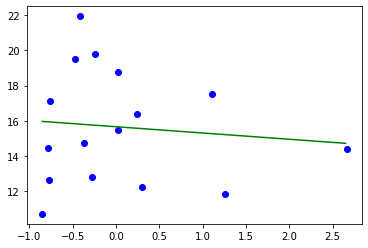

In [6]:
plt.plot(X, Y, 'bo')
plt.plot(x_line, y_line, 'g-')
plt.show()

## 텐서플로우 이용해 회귀식 구하기

In [7]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

### a와 b 랜덤값으로 초기화

In [8]:
import random

In [9]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())

### 잔차 제곱합을 반환하는 함수 만들기

In [10]:
def compute_loss():
  y_pred = a * X + b
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

### 활성화함수 설정

In [11]:
optimizer = tf.keras.optimizers.Adam(lr = 0.7)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### 모델 학습시키기(잔차제곱합의 최소값을 찾아서)

In [12]:
for i in range(2000):
  optimizer.minimize(compute_loss, var_list=[a,b])

  if i % 100 == 99:
    print(i+1, a.numpy(), b.numpy(), compute_loss().numpy())

100 -0.36203942 15.753303 9.787842
200 -0.3558733 15.669714 9.780804
300 -0.35583377 15.669315 9.780803
400 -0.3558338 15.669318 9.780802
500 -0.35583377 15.669318 9.780802
600 -0.355834 15.669318 9.780803
700 -0.35583407 15.669318 9.780803
800 -0.35583407 15.669318 9.780803
900 -0.35583404 15.669318 9.780803
1000 -0.3558339 15.669318 9.780803
1100 -0.35583434 15.669318 9.780803
1200 -0.3558342 15.669318 9.780803
1300 -0.3558338 15.669318 9.780802
1400 -0.35583514 15.669318 9.780804
1500 -0.35583422 15.669318 9.780803
1600 -0.35583436 15.669318 9.780804
1700 -0.3558355 15.669318 9.780805
1800 -0.3591305 15.669312 9.780812
1900 -0.35569498 15.669317 9.780803
2000 -0.35582608 15.669318 9.780804


### 시각화

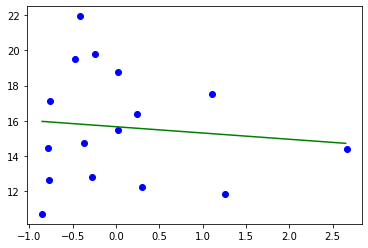

In [13]:
x_line = np.arange(min(X), max(X), 0.01)
y_line = a * x_line + b

plt.plot(X, Y, 'bo')
plt.plot(x_line, y_line, 'g-')
plt.show()

## 2차회귀모형으로 예측

In [14]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

In [15]:
def compute_loss1():
  y_pred = a * np.array(X) ** 2 + b * X + c
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

In [16]:
optimizer = tf.keras.optimizers.Adam(lr = 0.7)

for i in range(2000):
  optimizer.minimize(compute_loss1, var_list=[a,b,c])

  if i % 100 == 99:
    print(i+1, a.numpy(), b.numpy(), c.numpy(), compute_loss().numpy())

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


100 -0.5170412 0.38636923 16.023561 243.58633
200 -0.56494445 0.47673237 16.09928 240.90952
300 -0.5646341 0.47629482 16.098804 240.9223
400 -0.56463325 0.4762927 16.098804 240.92236
500 -0.5646331 0.47629288 16.098804 240.92236
600 -0.56463313 0.47629288 16.098804 240.92236
700 -0.56463313 0.4762929 16.098804 240.92236
800 -0.56463313 0.47629282 16.098804 240.92236
900 -0.5646331 0.47629285 16.098804 240.92236
1000 -0.564633 0.4762929 16.098804 240.92236
1100 -0.5646332 0.47629276 16.098804 240.92236
1200 -0.5646331 0.47629288 16.098804 240.92236
1300 -0.5646331 0.4762928 16.098804 240.92236
1400 -0.5646332 0.47629282 16.098804 240.92236
1500 -0.56463313 0.4762927 16.098804 240.92236
1600 -0.56463337 0.47629267 16.098804 240.92236
1700 -0.5646344 0.47629455 16.098806 240.92232
1800 -0.56463426 0.4762941 16.098806 240.92232
1900 -0.5646341 0.47629404 16.098806 240.92232
2000 -0.5646341 0.47629404 16.098806 240.92232


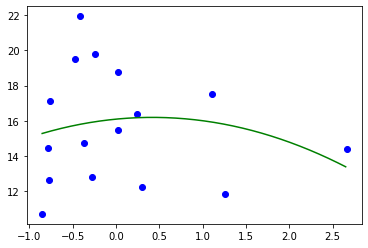

In [17]:
x_line = np.arange(min(X), max(X), 0.01)
y_line = a * x_line ** 2 + b * x_line + c

plt.plot(X, Y, 'bo')
plt.plot(x_line, y_line, 'g-')
plt.show()

## 3차 회귀모형

In [18]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

In [19]:
def compute_loss2():
  y_pred = a * np.array(X) ** 3 + b * np.array(X) ** 2 + c * X + d
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

In [20]:
optimizer = tf.keras.optimizers.Adam(lr = 0.1)

for i in range(2000):
  optimizer.minimize(compute_loss2, var_list=[a,b,c,d])

  if i % 100 == 99:
    print(i+1, a.numpy(), b.numpy(), c.numpy(), d.numpy(), compute_loss().numpy())

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


100 -1.6660898 6.8916864 -3.788135 8.087402 89.2505
200 -1.8241655 5.6194687 -1.0502568 11.78944 113.85043
300 -0.81481546 2.4208632 -0.49153355 13.878105 186.00824
400 0.09683175 -0.21514119 -0.42009664 15.267851 261.63678
500 0.69931567 -1.9444188 -0.39433157 16.1597 319.31696
600 1.0486238 -2.9464605 -0.38028082 16.675438 355.66785
700 1.2301978 -3.467283 -0.3730517 16.943388 375.41016
800 1.3151666 -3.711001 -0.36967632 17.068768 384.84787
900 1.3509984 -3.8137789 -0.36825094 17.121643 388.86594
1000 1.3646046 -3.8528044 -0.36771116 17.141718 390.39755
1100 1.3692433 -3.8661106 -0.3675272 17.148563 390.92047
1200 1.3706573 -3.8701663 -0.3674719 17.15065 391.07996
1300 1.371042 -3.8712692 -0.36745554 17.151215 391.12335
1400 1.3711332 -3.8715274 -0.36745733 17.15134 391.1335
1500 1.3711427 -3.8715537 -0.3674582 17.151352 391.13452
1600 1.3711435 -3.8715563 -0.36745784 17.151354 391.1346
1700 1.3711448 -3.8715606 -0.36745673 17.151358 391.13483
1800 1.371145 -3.8715615 -0.36745685 17

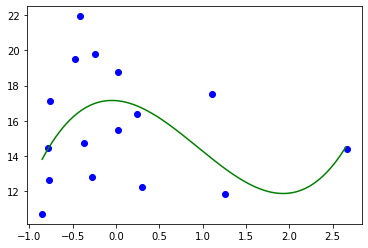

In [21]:
x_line = np.arange(min(X), max(X), 0.01)
y_line = a * x_line ** 3 + b * x_line ** 2 + c * x_line + d

plt.plot(X, Y, 'bo')
plt.plot(x_line, y_line, 'g-')
plt.show()

## 딥러닝 네트워크를 이용한 회귀

In [22]:
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [23]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

In [24]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(6, 'tanh', input_shape=(1,)),
                             tf.keras.layers.Dense(1)
])

In [25]:
model.compile(tf.keras.optimizers.Adam(0.7), loss = 'mse')

In [26]:
history = model.fit(X, Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 253.6155
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 177.1065
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 88.6721
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 33.5218
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 12.1798
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 25.9279
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 42.0505
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 43.7927
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 34.4748
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 22.3752
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 13.2542
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 9.8341
Epoch 13/100
1/1 [==============================

In [27]:
xline = np.arange(min(X), max(X), 0.01)
yline = model.predict(xline)

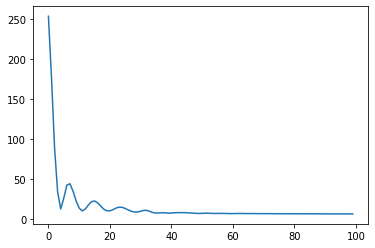

In [28]:
plt.plot(history.history['loss'])

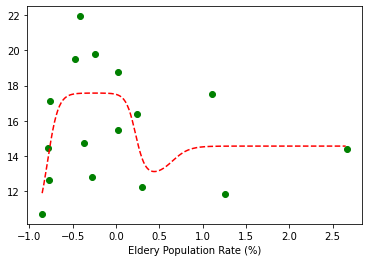

In [29]:
plt.plot(X, Y, 'go')
plt.plot(xline, yline, 'r--')
plt.xlabel('Population Growth Rate (%)')
plt.xlabel('Eldery Population Rate (%)')
plt.show()

# boston housing 데이터 분석

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### boston housing 데이터 불러오기

In [31]:
from tensorflow.keras.datasets import boston_housing

(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


### 데이터 표준화 해주기

In [32]:
x_mean = train_X.mean(axis = 0)
x_std = train_X.std(axis = 0)

y_mean = train_Y.mean(axis = 0)
y_std = train_Y.std(axis = 0)

In [33]:
train_X = (train_X - x_mean) / x_std
test_X = (test_X - x_mean) / x_std

train_Y = (train_Y - y_mean) / y_std
test_Y = (test_Y - y_mean) / y_std

In [34]:
len(train_X[0])

13

### 딥러닝 모델 만들기

In [35]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(64, 'relu', input_shape = (13,)),
                             tf.keras.layers.Dense(42, 'relu'),
                             tf.keras.layers.Dense(23, 'relu'),
                             tf.keras.layers.Dense(1)
])

In [36]:
model.compile(tf.keras.optimizers.Adam(lr=0.07), loss = 'mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [37]:
history = model.fit(train_X, train_Y, epochs = 130)

Epoch 1/130
13/13 [==============================] - 0s 3ms/step - loss: 2.7254
Epoch 2/130
13/13 [==============================] - 0s 3ms/step - loss: 0.7021
Epoch 3/130
13/13 [==============================] - 0s 3ms/step - loss: 0.5319
Epoch 4/130
13/13 [==============================] - 0s 4ms/step - loss: 0.3915
Epoch 5/130
13/13 [==============================] - 0s 3ms/step - loss: 0.3290
Epoch 6/130
13/13 [==============================] - 0s 3ms/step - loss: 0.2056
Epoch 7/130
13/13 [==============================] - 0s 3ms/step - loss: 0.2557
Epoch 8/130
13/13 [==============================] - 0s 3ms/step - loss: 0.2478
Epoch 9/130
13/13 [==============================] - 0s 3ms/step - loss: 0.2853
Epoch 10/130
13/13 [==============================] - 0s 3ms/step - loss: 0.2390
Epoch 11/130
13/13 [==============================] - 0s 3ms/step - loss: 0.2276
Epoch 12/130
13/13 [==============================] - 0s 5ms/step - loss: 0.1508
Epoch 13/130
13/13 [=================

In [38]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 4ms/step - loss: 0.1719


0.17189137637615204

### 시각화

In [39]:
pred_Y = model.predict(test_X)

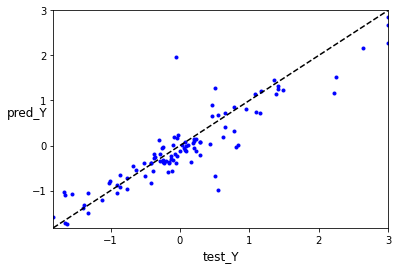

<Figure size 360x360 with 0 Axes>

In [40]:
plt.plot(test_Y, pred_Y, 'b.')
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], 'k--')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])
plt.xlabel('test_Y', fontsize=12)
plt.ylabel('pred_Y', rotation = 0, fontsize=12)
plt.figure(figsize=(5,5))
plt.show()

### validation dataset 나누기

In [41]:
history = model.fit(train_X, train_Y, epochs = 130, validation_split=0.25)

Epoch 1/130
10/10 [==============================] - 0s 10ms/step - loss: 0.0433 - val_loss: 0.0466
Epoch 2/130
10/10 [==============================] - 0s 7ms/step - loss: 0.0465 - val_loss: 0.0569
Epoch 3/130
10/10 [==============================] - 0s 5ms/step - loss: 0.0555 - val_loss: 0.0402
Epoch 4/130
10/10 [==============================] - 0s 8ms/step - loss: 0.0479 - val_loss: 0.0411
Epoch 5/130
10/10 [==============================] - 0s 6ms/step - loss: 0.0377 - val_loss: 0.0628
Epoch 6/130
10/10 [==============================] - 0s 6ms/step - loss: 0.0331 - val_loss: 0.0440
Epoch 7/130
10/10 [==============================] - 0s 6ms/step - loss: 0.0400 - val_loss: 0.0520
Epoch 8/130
10/10 [==============================] - 0s 6ms/step - loss: 0.0531 - val_loss: 0.0477
Epoch 9/130
10/10 [==============================] - 0s 6ms/step - loss: 0.0630 - val_loss: 0.1633
Epoch 10/130
10/10 [==============================] - 0s 6ms/step - loss: 0.0924 - val_loss: 0.0787
Epoch 11

In [42]:
model.evaluate(test_X, test_Y)
# 보통 validation split 해주면 evaluation 좋아짐 

4/4 [==============================] - 0s 3ms/step - loss: 0.2014


0.2014099508523941

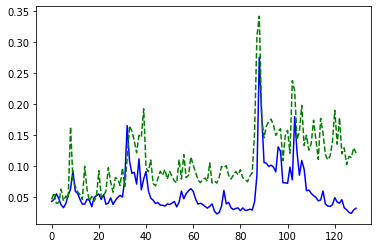

In [43]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'g--')
# 뒤쪽으로 갈수록 loss 가 늘어가는 것을 볼 수 있음 - earlystooping 제한 해주기
# 보통 loss 보다 val_loss 가 높을 수 밖에 없음

### callback - earlystopping 사용

In [44]:
history = model.fit(train_X, train_Y, epochs = 130, validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/130
10/10 [==============================] - 0s 10ms/step - loss: 0.0335 - val_loss: 0.1436
Epoch 2/130
10/10 [==============================] - 0s 6ms/step - loss: 0.0470 - val_loss: 0.1165
Epoch 3/130
10/10 [==============================] - 0s 6ms/step - loss: 0.0444 - val_loss: 0.1262
Epoch 4/130
10/10 [==============================] - 0s 6ms/step - loss: 0.0470 - val_loss: 0.1070
Epoch 5/130
10/10 [==============================] - 0s 6ms/step - loss: 0.0528 - val_loss: 0.1449
Epoch 6/130
10/10 [==============================] - 0s 6ms/step - loss: 0.0479 - val_loss: 0.1283
Epoch 7/130
10/10 [==============================] - 0s 6ms/step - loss: 0.0483 - val_loss: 0.1032
Epoch 8/130
10/10 [==============================] - 0s 8ms/step - loss: 0.0360 - val_loss: 0.1210
Epoch 9/130
10/10 [==============================] - 0s 6ms/step - loss: 0.0303 - val_loss: 0.1151
Epoch 10/130
10/10 [==============================] - 0s 8ms/step - loss: 0.0311 - val_loss: 0.1274
Epoch 11

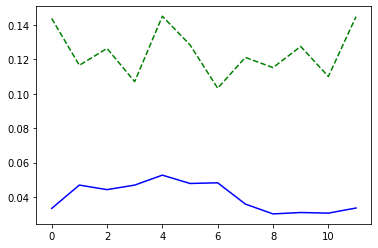

In [45]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'g--')
# early stopping 사용하니까 뒤로 갈수록 loss 늘었던 것을 줄여주는 것을 볼 수 있음

In [46]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 4ms/step - loss: 0.2080


0.20796974003314972